In [4]:

'''REQUIRED LIBRARIES'''
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

import plotly.graph_objs as go


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose


2024-03-16 14:17:28.236825: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 14:17:28.236946: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 14:17:28.273322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 14:17:28.386449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 14:17:30.130394: W tensorflow/compiler/tf2

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-03-16 14:17:36.271462: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 14:17:36.530116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 14:17:36.530166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [ ]:
def load_images_from_folder(filename : str, *resolution:int):
    '''
    inputs folder location as string and outputs the containing images as an array
    '''
    resolution=resolution
    # Set the path to the folder containing the images
    data_folder = filename

    # Initialize an empty list to store the images
    images = []

    # Iterate over the files in the data folder
    for filename in os.listdir(data_folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            img_path = os.path.join(data_folder, filename)
            img = Image.open(img_path)
            # Resize the image to (100, 100) ---- comment out if not needed
            img = img.resize((100,100))
            # Convert the image to RGB if it's not already in RGB format ---- comment out if not needed
            #if img.mode != 'RGB':
                #img = img.convert('RGB')
                
            # Append the image to the list
            images.append(img)

    # Convert the list of images to an array
    images_array = np.array([np.array(img) for img in images])

    return images_array


In [2]:
train_path_4 = '..//raw_data/archive/rendered_chairs/folder_b/'

In [18]:
def paginate_folder(dir_path, page_no, page_size):
    
    all_file_names = os.listdir(dir_path)
    all_file_names.sort()
    
    # page 1, page size 5000 -> first file index 0
    # page 2, page size 5000 -> first file index 2000
    first_file_in_page_index = (page_no - 1) * page_size
    
    return all_file_names[first_file_in_page_index : first_file_in_page_index + page_size]

    
    
    


In [25]:
def paginate_folder(dir_path, page_no, page_size):
    
    all_file_names = os.listdir(dir_path)
    all_file_names.sort()
    
    
    # page 1, page size 5000 -> first file index 0
    # page 2, page size 5000 -> first file index 2000
    first_file_in_page_index = (page_no - 1) * page_size
    
    page = all_file_names[first_file_in_page_index : first_file_in_page_index + page_size]
    
    x =[]
    for filename in page:
        x.append(os.path.join(dir_path, filename))
    
    return x
    
    

In [27]:
page = paginate_folder(train_path_4,1,10)

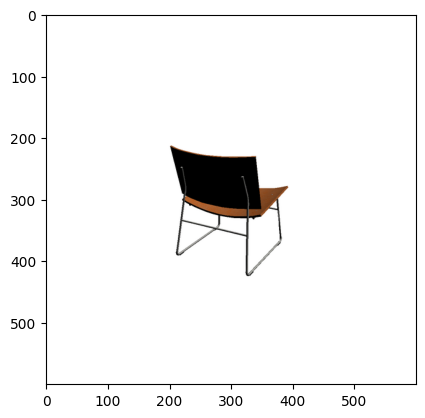

In [32]:
plt.imshow(mpimg.imread(page[0]))
plt.show();

In [37]:
import math

def page_numbers(dir_path, page_size):
    all_file_names = os.listdir(dir_path)
    return math.ceil( len(all_file_names)/page_size)

In [38]:
page_num = page_numbers(train_path_4,10)

8637

In [41]:
page_size = 1000
num_pages = page_numbers(train_path_4, page_size)
for page_num in range(1, num_pages):
    page_filenames =paginate_folder(train_path_4,page_num, page_size)
    print(f'page {page_num}, files found: {len(page_filenames)}')
    
    
    
    

page 1, files found: 1000
page 2, files found: 1000
page 3, files found: 1000
page 4, files found: 1000
page 5, files found: 1000
page 6, files found: 1000
page 7, files found: 1000
page 8, files found: 1000
page 9, files found: 1000
page 10, files found: 1000
page 11, files found: 1000
page 12, files found: 1000
page 13, files found: 1000
page 14, files found: 1000
page 15, files found: 1000
page 16, files found: 1000
page 17, files found: 1000
page 18, files found: 1000
page 19, files found: 1000
page 20, files found: 1000
page 21, files found: 1000
page 22, files found: 1000
page 23, files found: 1000
page 24, files found: 1000
page 25, files found: 1000
page 26, files found: 1000
page 27, files found: 1000
page 28, files found: 1000
page 29, files found: 1000
page 30, files found: 1000
page 31, files found: 1000
page 32, files found: 1000
page 33, files found: 1000
page 34, files found: 1000
page 35, files found: 1000
page 36, files found: 1000
page 37, files found: 1000
page 38, f

In [58]:
def filepath_to_preprocessed_array(filepath): 

    # Check if the file is an image
    if filepath.endswith(".jpg") or filepath.endswith(".png"):
        # Load the image
        img = Image.open(filepath).convert('L')
        # Resize the image to (100, 100) ---- comment out if not needed
        img = img.resize((100,100))
        # Convert the image to RGB if it's not already in RGB format ---- comment out if not needed
        #if img.mode != 'RGB':
            #img = img.convert('RGB')
        
        img = np.array(img)
        img = img/255.0
        # return image
        return img

In [59]:
filepath_to_preprocessed_array('..//raw_data/archive/rendered_chairs/folder_b/image2.png')

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [62]:
def filepaths_to_preprocessed_arrays(filepaths):
    result = []
    for f in filepaths:
        result.append(filepath_to_preprocessed_array(f))
    return np.array(result)


In [ ]:
page_size = 1000
num_pages = page_numbers(train_path_4, page_size)
for page_num in range(1, num_pages):
    page_filenames = paginate_folder(train_path_4,page_num, page_size)
    training_page = filepaths_to_preprocessed_arrays(page_filenames)
    
    print (f'fitting page number {page_num}')
    autoencoder_vae.fit(training_page,training_page, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10


2024-03-16 15:10:10.196920: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-16 15:10:16.954511: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8b8374ce80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-16 15:10:16.954558: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-03-16 15:10:17.007201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710601817.233390  511782 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 13s 59ms/step - loss: 1446.5406
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 990.0973
Epoch 3/10
32/32 [==============================] - 1s 25ms/step - loss: 971.6012
Epoch 4/10
32/32 [==============================] - 1s 24ms/step - loss: 898.1351
Epoch 5/10
32/32 [==============================] - 1s 24ms/step - loss: 857.2836
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 814.7551
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 788.8507
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 765.2636
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 754.2668
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 744.0227
Epoch 1/10
32/32 [==============================] - 1s 29ms/step - loss: 814.0519
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 767.0428
Epoch 3/10
32/32 [======

32/32 [==============================] - 1s 24ms/step - loss: 433.7996
Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 505.6257
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 454.3123
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 435.0677
Epoch 4/10
32/32 [==============================] - 1s 24ms/step - loss: 425.3730
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 419.9601
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 417.2818
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 410.7824
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 405.7871
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 401.3562
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 397.8983
Epoch 1/10
32/32 [==============================] - 1s 28ms/step - loss: 555.1539
Epoch 2/10
32/32 [========

Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 447.0152
Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 505.3730
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 470.8245
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 463.9507
Epoch 4/10
32/32 [==============================] - 1s 24ms/step - loss: 459.0854
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 451.1891
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 447.3851
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 438.0743
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 433.4122
Epoch 9/10
32/32 [==============================] - 1s 26ms/step - loss: 431.3080
Epoch 10/10
32/32 [==============================] - 1s 25ms/step - loss: 429.2615
Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 485.5012
Epoch 2/10
32/

32/32 [==============================] - 1s 24ms/step - loss: 399.1451
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 395.4719
Epoch 1/10
32/32 [==============================] - 1s 27ms/step - loss: 427.9825
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 405.4388
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 399.2048
Epoch 4/10
32/32 [==============================] - 1s 28ms/step - loss: 389.5914
Epoch 5/10
32/32 [==============================] - 1s 24ms/step - loss: 386.3807
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 384.2373
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 382.4503
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 376.3610
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 376.8943
Epoch 10/10
32/32 [==============================] - 1s 25ms/step - loss: 373.9099
Epoch 1/10
32/32 [=======

32/32 [==============================] - 1s 24ms/step - loss: 381.5796
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 380.5818
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 379.0348
Epoch 1/10
32/32 [==============================] - 1s 28ms/step - loss: 559.8519
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 521.9839
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 489.0363
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 475.2201
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 459.9004
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 453.5674
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 451.1050
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 445.8399
Epoch 9/10
32/32 [==============================] - 1s 25ms/step - loss: 445.6240
Epoch 10/10
32/32 [=======

32/32 [==============================] - 1s 25ms/step - loss: 353.2102
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 349.6436
Epoch 9/10
32/32 [==============================] - 1s 24ms/step - loss: 348.1460
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 346.3238
Epoch 1/10
32/32 [==============================] - 1s 29ms/step - loss: 447.6054
Epoch 2/10
32/32 [==============================] - 1s 24ms/step - loss: 424.7275
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 414.4295
Epoch 4/10
32/32 [==============================] - 1s 25ms/step - loss: 405.3868
Epoch 5/10
32/32 [==============================] - 1s 24ms/step - loss: 400.8346
Epoch 6/10
32/32 [==============================] - 1s 24ms/step - loss: 400.1349
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 394.8773
Epoch 8/10
32/32 [==============================] - 1s 24ms/step - loss: 394.0416
Epoch 9/10
32/32 [========

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dense, ZeroPadding2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K

def sampling(args):
    '''Reparametrization trick z-mu +sigma +epsilon'''
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def build_encoder_vae(input_shape, encoding_dim):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    flattened = Flatten()(x)
    z_mean = Dense(encoding_dim, name='z_mean')(flattened)
    z_log_var = Dense(encoding_dim, name='z_log_var')(flattened)
    z = Lambda(sampling, output_shape=(encoding_dim,), name='z')([z_mean, z_log_var])
    return Model(input_img, [z_mean, z_log_var, z])

def build_decoder_vae(encoded_dim, input_shape):
    input_encoded = Input(shape=(encoded_dim,))
    x = Dense(12 * 12 * 128, activation='relu')(input_encoded)  # Calculate the number of neurons to match the desired shape
    x = Reshape((12, 12, 128))(x)  # Reshape to match the shape after the last pooling layer in the encoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Change padding to 'same'
    x = UpSampling2D((2, 2))(x)
    x = ZeroPadding2D(2)(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Change padding to 'same'
    return Model(input_encoded, decoded)

# Define input shape and encoding dimension
input_shape = (100, 100, 1)
encoding_dim = 100  # Example encoding dimension

# Build encoder and decoder
encoder_vae = build_encoder_vae(input_shape, encoding_dim)
print(encoder_vae.output_shape)

decoder_vae = build_decoder_vae(encoding_dim, input_shape)

# Combine encoder and decoder into autoencoder
input_img = Input(shape=input_shape)
z_mean, z_log_var, z = encoder_vae(input_img)
decoded = decoder_vae(z)
autoencoder_vae = Model(input_img, decoded)

# Define the VAE loss
reconstruction_loss = binary_crossentropy(K.flatten(input_img), K.flatten(decoded))
reconstruction_loss *= input_shape[0] * input_shape[1]
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
autoencoder_vae.add_loss(vae_loss)

# Compile the VAE
autoencoder_vae.compile(optimizer='adam')

2024-03-16 15:08:39.965763: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 15:08:39.966665: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 15:08:39.966734: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 15:08:40.185962: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-16 15:08:40.186207: I external/local_xla/xla/stream_executor

[(None, 100), (None, 100), (None, 100)]
